In [3]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"

In [4]:
from sklearn.neighbors import KNeighborsRegressor

In [5]:
# 집값 예측

In [6]:
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [7]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [8]:
len(data[0]), data[0]

(13,
 array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
        6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
        4.980e+00]))

In [9]:
# 학습용은 data, target
# sklearn - > np.array  2D

In [10]:
data.shape, target.shape

((506, 13), (506,))

In [11]:
# 모델선택
# 데이터만들기(전처리)  스케일링,결측치 또는 이상치
# 데이터의 속성(컬럼) 회귀속성을 가지는 컬럼들을 선택  - 1. 전부,   2. 상관계수 및 시각화, sns pairplot
# 학습

In [12]:
# 일부 모델중에는 퓨처의 중요도를 알려주는 모델
# 도메인지식 : 업무상 중요한 피처는 비지니스를 통해 파악
# 상관관계
# 순차적용 알고리즘

In [13]:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's


In [14]:
import pandas as pd

cols = ["CRIM",     
"ZN"   ,    
  "INDUS"  ,
  "CHAS"   ,
  "NOX"    ,
  "RM"     ,
  "AGE"    ,
  "DIS"    ,
  'RAD'    ,
  "TAX"    ,
  "PTRATIO" ,
  'B' ,       
  "LSTAT"]
df = pd.concat( [pd.DataFrame(data,columns = cols), pd.DataFrame(target,columns = ['MEDV'])],axis=1 )
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
# 모델 선정
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [14]:
# 데이터 전처리
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [15]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
import seaborn as sns
sns.pairplot(df)

Output hidden; open in https://colab.research.google.com to view.

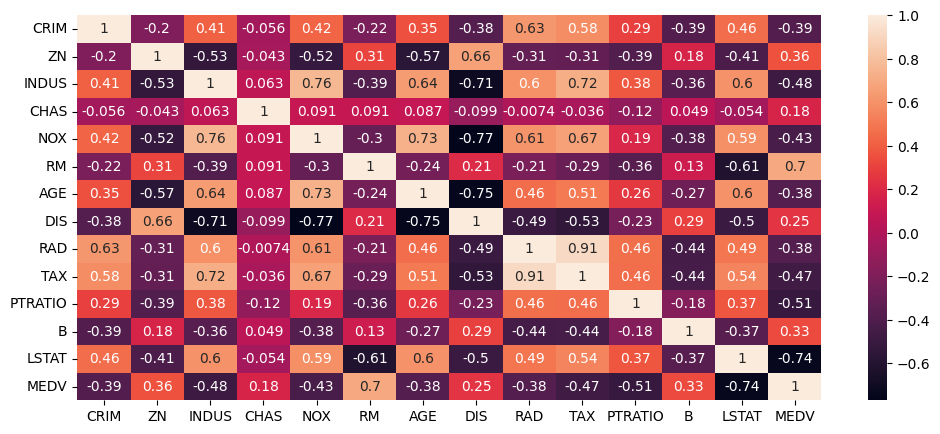

In [32]:
# 상관지수
import matplotlib.pyplot as plt
corr = df.corr()
corr
plt.figure(figsize=(12,5))
sns.heatmap(corr, annot=True)
plt.show()

In [25]:
# 스케일링
# 사이킷런은 넘파이 형태의 2차원 데이터 가 적합
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()
m = np.mean(X,axis=0)
s = np.std(X,axis=0)
X = (X-m) / s

In [ ]:
# corr_matrix = np.corrcoef(X)
# corr_matrix
# plt.figure(figsize=(12,5))
# sns.heatmap(corr_matrix, annot=True)
# plt.show()

In [38]:
# 절대값이 0.65 이상인 값들
corr[corr >= 0.65]
# RM, TAX, DIS


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,NaN
INDUS,NaN,NaN,1.000000,NaN,0.763651,NaN,NaN,NaN,NaN,0.720760,NaN,NaN,NaN,NaN
CHAS,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOX,NaN,NaN,0.763651,NaN,1.000000,NaN,0.73147,NaN,NaN,0.668023,NaN,NaN,NaN,NaN
RM,NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.69536
AGE,NaN,NaN,NaN,NaN,0.731470,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,0.664408,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.910228,NaN,NaN,NaN,NaN
TAX,NaN,NaN,0.720760,NaN,0.668023,NaN,NaN,NaN,0.910228,1.000000,NaN,NaN,NaN,NaN


In [57]:
# 분할 훈련용과 테스트용
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(X,Y,random_state=42)

In [58]:
knr = KNeighborsRegressor()
# 학습
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [59]:
# 평가
knr.score(x_test,y_test)

0.5918207754129865

In [60]:
# 컬럼 재 조정
# RM, TAX, DIS
X = df.loc[:, ['RM', 'TAX', 'DIS'] ].to_numpy()
Y = df.iloc[:,-1].to_numpy()
m = np.mean(X, axis=0)
s = np.std(X, axis=0)
X = (X- m) / s

In [61]:
# 분할
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)

In [62]:
# 학습
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [63]:
# 평가
knr.score(x_test,y_test)

0.5918207754129865

In [69]:
#  CHAS RAD
cols = [col for col in df.columns if col not in ['CHAS', 'RAD','MEDV']]
X = df.loc[:,cols].to_numpy()
m = np.mean(X,axis=0)
s = np.std(X, axis=0)
X = (X-m)/s
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=42)

In [70]:
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_test,y_test)

0.8076496151550314

In [72]:
!pip install -U mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.1 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [1]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [16]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]
m = np.mean(X,axis=0)
s = np.mean(X,axis=0)
X = (X-m)/s
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)
sfs = SequentialFeatureSelector(knr,k_features=5,forward=True,scoring='neg_mean_squared_error', cv=5)
sfs.fit(x_train,y_train)
selected_features = sfs.k_feature_idx_
selected_features

(4, 5, 9, 11, 12)

In [24]:
X = X.iloc[:,[4,5,9, 11, 12]].to_numpy()
x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=42)
knr = KNeighborsRegressor()
knr.fit(x_train,y_train)
knr.score(x_test,y_test)

0.7309418570409887